# Udacity Data Wrangling Project - WeRateDogs (twitter page)

The purpose of this project is to learn how to access and obtain data from various sources. This will follow by wrangling them and merge them together so that I would be able to see the full/bigger picture. This would enable to eventually make correct decisions, depending on what I/business would need to understand.

In this project, data from a Twitter page 'WeRateDogs' will be used.

## Gathering Data

For this project, I will be accessing three datasets:

1) Archive Twitter data (retweet count and favorite count are ommitted)

2) Image prediction

3) Retweets by accessing Twitter account so that the ommitted accounts from the first dataset can be added

In [192]:
# Import relevant packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os

In [193]:
# Getting the first dataset that is given
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [194]:
# Getting the second dataset which is the image prediction of breed
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [195]:
# Save the file    
with open (os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [196]:
# Read from the downloaded file
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [197]:
# Access Twitter account to obtain the third dataset - the one with retweet counts and favourite counts
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [198]:
# Get the list of IDs as the unique identifier, in order to find the 
tweet_ids = list(df_twitter['tweet_id'])

In [8]:
active_tweets = {}

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet)
        active_tweets[str(tweet)] = tweet_status._json
    except:
        print ("No status found for : ", str(tweet))

No status found for :  888202515573088257
No status found for :  873697596434513921
No status found for :  872668790621863937
No status found for :  869988702071779329
No status found for :  866816280283807744
No status found for :  861769973181624320
No status found for :  845459076796616705
No status found for :  842892208864923648
No status found for :  837012587749474308
No status found for :  827228250799742977
No status found for :  802247111496568832
No status found for :  775096608509886464
No status found for :  770743923962707968


Rate limit reached. Sleeping for: 661


No status found for :  754011816964026368


Rate limit reached. Sleeping for: 683


In [210]:
for value in active_tweets.values():
    print (value)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [9]:
import json

In [201]:
with open('tweet_json.txt', 'w') as file:
    json.dump(active_tweets,
             file,
             sort_keys = True,
             indent = 4)

In [267]:
df_current_tweets = pd.read_json('tweet_json.txt', orient='index')

In [343]:
# Copying all three datasets
df_twitter_copy = df_twitter.copy()
df_image_prediction_copy = df_image_prediction.copy()
df_current_tweets_copy = df_curren_tweets.copy()

## Assessing

Examining the dataset to understand the structure and content of data. For data wrangling purpose, this is for quality and tidyness issue of the dataset and to eventually to fix and improve so that the data can be understood better.

In [344]:
df_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Important to know the column names in order to merge with other dataset. It is probably going to be the 'tweet_id'.

In [345]:
df_twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [346]:
df_twitter_copy.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
an             7
Toby           7
Bailey         7
Buddy          7
Leo            6
Dave           6
Scout          6
Stanley        6
Bella          6
Jack           6
Milo           6
Oscar          6
Koda           6
Jax            6
Rusty          6
Oakley         5
            ... 
Hector         1
Superpup       1
Chuq           1
Dylan          1
Iroh           1
Harnold        1
Ridley         1
Harlso         1
Stella         1
Shiloh         1
Henry          1
Lillie         1
Ginger         1
Dale           1
Sprinkles      1
Maks           1
Bronte         1
Mya            1
Andru          1
Nida           1
Ben            1
Lorelei        1
Kloey          1
Mark           1
Molly          1
Livvie         1
Gert           1
Lugan         

In [347]:
df_twitter_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [348]:
df_twitter_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [349]:
sum(df_twitter_copy.rating_denominator != 10) + sum(df_twitter_copy.rating_denominator == 0)

24

### Quality issues

1) Name column : 55 has name as 'a', 7 has 'an', 8 has 'the'. All are lower cases and unlikely to be a name. Need to remove total 70.

2) Retweets : 181 are retweets. These are to be removed as per instruction.

3) 23 that the denominators not equal to '10' including the one with '0' should be removed for equal comparison

In [350]:
# Understanding braod data structure and column names. As guessed, 'tweet_id' would be the key.
# Need to be aware that it has 2075 data instead of 2356 from t_df hence, mismatch or further data enhancement expected
df_image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [351]:
df_image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issues

4) Make block and small letters consistent for p1, p2 and p3 columns (x 3)

5) Remove '_' between names

In [352]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [353]:
df_current_tweets_copy.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2541,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [354]:
df_current_tweets_copy.possibly_sensitive.value_counts()

0.0    2206
Name: possibly_sensitive, dtype: int64

### Quality issues

6) Change column name 'id' to 'tweet_id' to match with other datasets ('id_str' will be left as it is for the time being - dataset too cleansed may not always help)

7) 'id_str' is in int64 format, instead of string, as the title implies. The same applies to the following columns: in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str 

8) No value at all for 'possible-sensitive' hence can be removed

### Tidiness issues
1) Link all three datasets using 'tweet_id'

2) 'timestamp' column in 'df_twitter_copy' needs to have correct format (ie. datetime). This removes last set of data '+0000' which adds no value.

## Cleaning data

#### 1) Define - Names that are not names

The 'name' column from dataset 'df_twitter_copy' has names that does not look like a name. They will be replaced to 'None'. The reason changing them to 'None' instead of NaN, is because there are values that are 'None' hence is for consistency purpose.

#### Code

In [355]:
df_twitter_copy.name.replace('the', 'None', inplace = True)
df_twitter_copy.name.replace('a', 'None', inplace = True)
df_twitter_copy.name.replace('an', 'None', inplace = True)

#### Test

In [356]:
df_twitter_copy[df_twitter_copy.name == 'the']
df_twitter_copy[df_twitter_copy.name == 'a']
df_twitter_copy[df_twitter_copy.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


As no values are returned with neither 'the', 'a' and 'an', this confirms all those are removed

#### 2) Define - Remove retweet
From 'df_twitter_copy', those with 'retweeted_status_id' column that are not null, are retweets. These needs to be removed since they are duplicates of the original for this EDA purpose and hence would not give correct picture of the score. There are 181 of them currently.

#### Code

In [357]:
df_twitter_copy = df_twitter_copy[df_twitter_copy.retweeted_status_id.isnull()]

#### Test

In [474]:
df_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 197.7+ KB


#### 3) Define - Remove those with denominator not equal to 10

This is to ensure the tweets are compared in same condition

#### Code

In [359]:
df_twitter_copy = df_twitter_copy[df_twitter_copy.rating_denominator == 10]

#### Test

In [475]:
df_twitter_copy.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### 4) Define

Make first letter of each word capital letter in 'df_image_prediction_copy', under columns p1, p2 and p3

#### Code

In [490]:
df_image_prediction_copy['p1'] = df_image_prediction_copy['p1'].str.title()
df_image_prediction_copy['p2'] = df_image_prediction_copy['p2'].str.title()
df_image_prediction_copy['p3'] = df_image_prediction_copy['p3'].str.title()

#### Test

In [489]:
df_image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 5) Define

Replace the underscore in the p1, p2, p3 columns in df_image_prediction_copy

#### Code

In [363]:
df_image_prediction_copy['p1'] = df_image_prediction_copy['p1'].str.replace('_', ' ')
df_image_prediction_copy['p2'] = df_image_prediction_copy['p2'].str.replace('_', ' ')
df_image_prediction_copy['p3'] = df_image_prediction_copy['p3'].str.replace('_', ' ')

#### Test

In [364]:
df_image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 6) Define

Rename 'id' on 'df_curren_tweets_copy' to 'tweet_id' to match other datasets and therefore later, can be merged

#### Code

In [365]:
df_current_tweets_copy.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [366]:
df_current_tweets_copy.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

#### 7) Define - Ensure the column data type is as the column name implies

'df_curren_tweets_copy' : 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str' is in int64 format, instead of string, as the title implies. The same applies to the following columns: in_reply_to_status_id, in_reply_to_user_id, 

In [367]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

#### Code

In [368]:
df_current_tweets_copy.id_str = df_current_tweets_copy.id_str.astype(str)
df_current_tweets_copy.quoted_status_id_str = df_current_tweets_copy.quoted_status_id_str.astype(str)
df_current_tweets_copy.in_reply_to_status_id_str = df_current_tweets_copy.in_reply_to_status_id_str.astype(str)
df_current_tweets_copy.in_reply_to_user_id_str = df_current_tweets_copy.in_reply_to_user_id_str.astype(str)


#### Test

In [369]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2342 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2342 non-null object
is_quote_status                 

#### 8) Define - remove column with no adding values

'possible_sensitive' in 'df_curren_tweets_copy' does not have any meaningful values. This column is to be removed.

In [370]:
df_current_tweets_copy.possibly_sensitive.value_counts()

0.0    2206
Name: possibly_sensitive, dtype: int64

In [371]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2342 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2342 non-null object
is_quote_status                 

#### Code

In [372]:
df_current_tweets_copy_1 = df_current_tweets_copy.copy()

In [373]:
df_current_tweets_copy_1 = df_current_tweets_copy.drop('possibly_sensitive', 1)

In [374]:
df_current_tweets_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2342 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2342 non-null object
is_quote_status                 

In [379]:
df_current_tweets_copy = df_current_tweets_copy_1.copy()

In [381]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2342 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2342 non-null object
is_quote_status                 

### Other wrangling requirements that were identified after initial assessment

#### 9) Define
Convert the 'timestamp' column to DateTime type

#### Code

In [383]:
# Understanding type of data in 'timestamp' column
type(df_twitter_copy['timestamp'][0])

str

In [384]:
df_twitter_copy['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-07-15 23:25:31 +0000
30      2017-0

In [385]:
# Testing if the third slot after spliting each entry by space, adds any value

third_timestamp_info = []
for each_timestamp in df_twitter_copy['timestamp']:
    third_timestamp_info.append(each_timestamp.split(' ')[2])

from collections import Counter
result = Counter(third_timestamp_info)
print (result)

Counter({'+0000': 2153})


In [386]:
df_twitter_copy['timestamp'] = pd.to_datetime(df_twitter_copy['timestamp'])

In [387]:
df_twitter_copy['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2325   2015-11-17 00:53:15
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2

#### Test

In [388]:
type(df_twitter_copy['timestamp'][0])

pandas._libs.tslib.Timestamp

#### 10) Define

'df_current_tweets_copy' also has retweeted items. Need to remove them.

#### Code

In [389]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2342 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2342 non-null object
is_quote_status                 

In [406]:
df_current_tweets_copy.drop(
    df_current_tweets_copy[
        df_current_tweets_copy['retweeted_status'].
        notnull()== True].
    index,
    inplace=True)

#### Test

In [411]:
df_current_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
tweet_id                         2174 non-null int64
id_str                           2174 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2174 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          2174 non-null object
is_quote_status                 

#### 10) Define

Remove columns that are not needed

#### Code

In [409]:
df_twitter_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
                     'retweeted_status_id', 'expanded_urls', 'retweeted_status_user_id',
                     'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [410]:
df_twitter_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

## Tidiness

#### 1) Define

Merge three datasets using 'tweet_id'

#### Code

In [412]:
full_dataset_df = pd.merge(df_twitter_copy, df_image_prediction_copy, on='tweet_id', how='inner')
full_dataset_df = pd.merge(full_dataset_df, df_current_tweets_copy,on='tweet_id', how='inner')

#### Test

In [413]:
full_dataset_df.columns

Index(['tweet_id', 'timestamp', 'text_x', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text_y', 'truncated', 'user'],
      dtype='object')

#### 2) Define

Remove 'contributors' and 'coordinates' column which has only 'nan' as a value

#### Code

In [178]:
full_dataset_df.contributors.unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1269   NaN
1270   NaN
1271   NaN
1272   NaN
1273   NaN
1274   NaN
1275   NaN
1276   NaN
1277   NaN
1278   NaN
1279   NaN
1280   NaN
1281   NaN
1282   NaN
1283   NaN
1284   NaN
1285   NaN
1286   NaN
1287   NaN
1288   NaN
1289   NaN
1290   NaN
1291   NaN
1292   NaN
1293   NaN
1294   NaN
1295   NaN
1296   NaN
1297   NaN
1298   NaN
Name: contributors, Length: 1299, dtype: float64>

In [179]:
full_dataset_df.coordinates.unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1269   NaN
1270   NaN
1271   NaN
1272   NaN
1273   NaN
1274   NaN
1275   NaN
1276   NaN
1277   NaN
1278   NaN
1279   NaN
1280   NaN
1281   NaN
1282   NaN
1283   NaN
1284   NaN
1285   NaN
1286   NaN
1287   NaN
1288   NaN
1289   NaN
1290   NaN
1291   NaN
1292   NaN
1293   NaN
1294   NaN
1295   NaN
1296   NaN
1297   NaN
1298   NaN
Name: coordinates, Length: 1299, dtype: float64>

In [180]:
full_dataset_df.drop(['contributors',
               'coordinates'], axis=1,inplace=True)

#### Test

In [181]:
full_dataset_df.columns

Index(['tweet_id', 'timestamp', 'text_x', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'created_at', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'text_y',
       'truncated', 'user'],
      dtype='object')

## Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [415]:
# Storing the merged data into a CSV file
full_dataset_df.to_csv('twitter_archive_master.csv')
df_twitter_copy.to_csv('twitter_archive_data.csv')
df_image_prediction_copy.to_csv('image_prediction_archive_data.csv')
df_current_tweets_copy.to_csv('current_tweets_data.csv')

In [427]:
# Storing the merged data into a SQL file
import mysql.connector
from sqlalchemy import create_engine

engine = create_engine('mysql+mysqlconnector://[user]:[pass]@[host]:[port]/[schema]', echo=False)

full_dataset_df.to_sql('twitter_archive_master_sql', con=engine, index=False,)

ModuleNotFoundError: No module named 'mysql'

## Analyse and Visualise

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [428]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [429]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 46 columns):
Unnamed: 0                       1288 non-null int64
tweet_id                         1288 non-null int64
timestamp                        1288 non-null object
text_x                           1288 non-null object
rating_numerator                 1288 non-null int64
rating_denominator               1288 non-null int64
name                             1288 non-null object
jpg_url                          1288 non-null object
img_num                          1288 non-null int64
p1                               1288 non-null object
p1_conf                          1288 non-null float64
p1_dog                           1288 non-null bool
p2                               1288 non-null object
p2_conf                          1288 non-null float64
p2_dog                           1288 non-null bool
p3                               1288 non-null object
p3_conf                          128

In [431]:
df_master['rating_numerator'].describe()

count    1288.000000
mean       12.237578
std        50.568987
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [432]:
df_master['rating_denominator'].describe()

count    1288.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [434]:
%matplotlib inline
import matplotlib.pyplot as plt

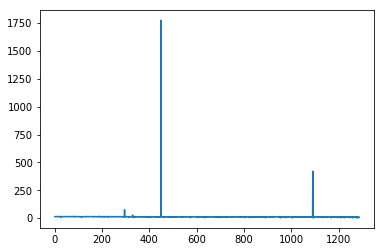

In [435]:
plt.plot(df_master.rating_numerator)

In [444]:
df_master.loc[df_master['rating_numerator'] > 13]

,Unnamed: 0,tweet_id,timestamp,text_x,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text_y,truncated,user
13,13,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Limousine,...,NaN,NaN,NaN,11486,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,0,"{'contributors_enabled': False, 'created_at': ..."
24,24,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,...,NaN,NaN,NaN,5571,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",1,"{'contributors_enabled': False, 'created_at': ..."
41,41,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive r...,14,10,Emmy,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French Bulldog,...,NaN,NaN,NaN,6739,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,0,"{'contributors_enabled': False, 'created_at': ..."
72,72,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus....,14,10,None,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,Pole,...,NaN,NaN,NaN,8821,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,1,"{'contributors_enabled': False, 'created_at': ..."
82,82,860184849394610176,2017-05-04 17:30:24,Here we have perhaps the wisest dog of all. Ab...,14,10,None,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,Chimpanzee,...,NaN,NaN,NaN,5967,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,1,"{'contributors_enabled': False, 'created_at': ..."
94,94,856526610513747968,2017-04-24 15:13:52,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",14,10,None,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,Old English Sheepdog,...,NaN,NaN,NaN,1942,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",0,"{'contributors_enabled': False, 'created_at': ..."
95,95,856282028240666624,2017-04-23 23:01:59,"This is Cermet, Paesh, and Morple. They are ab...",14,10,Cermet,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,...,NaN,NaN,NaN,6531,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",1,"{'contributors_enabled': False, 'created_at': ..."
149,149,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy dogg...,14,10,Smiley,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1,Pembroke,...,NaN,NaN,NaN,2526,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,1,"{'contributors_enabled': False, 'created_at': ..."
161,161,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. Th...",14,10,one,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,Golden Retriever,...,NaN,NaN,NaN,1467,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",0,"{'contributors_enabled': False, 'created_at': ..."
170,170,825535076884762624,2017-01-29 02:44:34,Here's a very loving and accepting puppo. Appe...,14,10,None,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,...,NaN,NaN,NaN,18755,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,1,"{'contributors_enabled': False, 'created_at': ..."


### Insight 1
Out of 1288 entries, the average score is 12.24. Despite there is minimum score of 1, IQR is between 10 to 12, which is fairly high, given the denominator is 10. The reason why the average score is 12.24 is probably because the outsider of score 1776 and other 21 whose value is greater than 13 (ie. 420, 75, 27 etc)

In [445]:
df_master.head()

,Unnamed: 0,tweet_id,timestamp,text_x,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text_y,truncated,user
0,0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,NaN,NaN,NaN,4089,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1,1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,NaN,NaN,NaN,8503,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."
2,2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,NaN,NaN,NaN,9207,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'contributors_enabled': False, 'created_at': ..."
3,3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,...,NaN,NaN,NaN,3064,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,1,"{'contributors_enabled': False, 'created_at': ..."
4,4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,...,NaN,NaN,NaN,18567,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,1,"{'contributors_enabled': False, 'created_at': ..."


In [448]:
df_master.name.value_counts()

None          410
Oliver          8
Tucker          7
Winston         7
Lucy            6
Cooper          6
Penny           6
Bailey          5
Lola            5
Sadie           5
Bella           5
Toby            5
Clarence        4
Clark           4
Sophie          4
Dexter          4
Cassie          3
Jimothy         3
Derek           3
Louis           3
Scout           3
Hank            3
Winnie          3
Riley           3
Maggie          3
Daisy           3
Gus             3
Malcolm         3
Finn            3
Gary            3
             ... 
Bubba           1
Andru           1
Bobby           1
Lizzie          1
Jomathan        1
Willow          1
Leonard         1
Marvin          1
Kaia            1
Mitch           1
Edmund          1
Willem          1
Betty           1
Bubbles         1
Tessa           1
Bones           1
Ginger          1
Bookstore       1
Craig           1
Maxaroni        1
Carll           1
Dudley          1
Longfellow      1
Ralphson        1
Benji     

### Insight 2
Out of 1288 dogs, the most common name is Oliver with 8 dogs with same name. Given it is 0.9% excluding 410 without names, the dogs names seems to be very unique. 

In [449]:
df_master.favorite_count.describe()

count      1288.000000
mean       8238.143634
std       11494.433194
min          80.000000
25%        1686.500000
50%        3784.000000
75%       10235.000000
max      127573.000000
Name: favorite_count, dtype: float64

### Insight 3
Favourite count is one main way to know how many people 'liked' the photo. The average of 8238 is very high number and shows how popular this twitter page is. The minimum is 80, which can be considered as higher than most, and maximum is 127,573 which proves this is one of the most popular twitter page. The IQR is between 10,235 to 1,686, with median of 3,784. Very wide range is noted.

In [452]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 46 columns):
Unnamed: 0                       1288 non-null int64
tweet_id                         1288 non-null int64
timestamp                        1288 non-null object
text_x                           1288 non-null object
rating_numerator                 1288 non-null int64
rating_denominator               1288 non-null int64
name                             1288 non-null object
jpg_url                          1288 non-null object
img_num                          1288 non-null int64
p1                               1288 non-null object
p1_conf                          1288 non-null float64
p1_dog                           1288 non-null bool
p2                               1288 non-null object
p2_conf                          1288 non-null float64
p2_dog                           1288 non-null bool
p3                               1288 non-null object
p3_conf                          128

### Insight 4
Correlation between 'retweet_count' and 'favourite_count' to understand the relationship between the two

Text(0,0.5,'Favourite count')

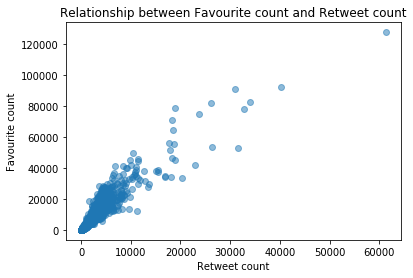

In [504]:
plt.scatter(x=df_master.retweet_count, y=df_master.favorite_count, alpha = 0.5)
plt.title("Relationship between Favourite count and Retweet count")
plt.xlabel("Retweet count")
plt.ylabel("Favourite count")

In [506]:
df_master.retweet_count.corr(df_master.favorite_count, method="pearson")

0.9261796744053018

As it shows very strong correlation of 0.926, I can comfortably conclude, despite there are some outliers, the higher the retweet counts, the higher favourite counts. This makes sense because people retweets if they 'like' it and 'like' is one of the synopsis of being 'favoured' in extended term.

### Insights 5

In [539]:
df_master.p1.value_counts().head()

Golden Retriever      93
Pembroke              65
Labrador Retriever    59
Chihuahua             45
Pug                   39
Name: p1, dtype: int64

The top five breeds that gets most 'likes/favourites' is:

1) Golden Retriever      93;

2) Pembroke              65;

3) Labrador Retriever    59;

4) Chihuahua             45;

5) Pug                   39

Having said that, by far, Golden Retriever is an absolute winner.

### Insight 6

In [542]:
df_master.lang.value_counts()

en    1284
nl       2
et       1
in       1
Name: lang, dtype: int64

In terms of language, English seems just by far the most used language. Out of 1288, 1294 was in English. I wouldn't say all the tweets were only from US or the UK, but certainly by those who speaks English.

In [533]:
temp_master = df_master[df_master.in_reply_to_screen_name.notnull() == True]

In [534]:
temp_master

,tweet_id,timestamp,text_x,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,is_quote_status,lang,place,possibly_sensitive_appealable,retweet_count,retweeted,source,text_y,truncated,user
94,856526610513747968,2017-04-24 15:13:52,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",14,10,None,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,Old English Sheepdog,0.798481,...,0,en,NaN,0.0,1942,0,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",0,"{'contributors_enabled': False, 'created_at': ..."
121,844979544864018432,2017-03-23 18:29:57,PUPDATE: I'm proud to announce that Toby is 23...,13,10,None,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,Tennis Ball,0.999281,...,0,en,NaN,0.0,2755,0,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,0,"{'contributors_enabled': False, 'created_at': ..."
467,746818907684614144,2016-06-25 21:34:37,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,13,10,None,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,1,Dingo,0.175518,...,0,en,NaN,0.0,1857,0,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,0,"{'contributors_enabled': False, 'created_at': ..."
534,729838605770891264,2016-05-10 01:00:58,"""Challenge completed"" \n(pupgraded to 12/10) h...",12,10,None,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,Stone Wall,0.758218,...,0,en,NaN,0.0,410,0,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",0,"{'contributors_enabled': False, 'created_at': ..."
648,705786532653883392,2016-03-04 16:06:36,"Seriously, add us 🐶 11/10 for sad wet pupper h...",11,10,None,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,Web Site,0.550294,...,0,en,NaN,0.0,561,0,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",0,"{'contributors_enabled': False, 'created_at': ..."
653,704871453724954624,2016-03-02 03:30:25,I found a forest Pipsy. 12/10 https://t.co/mIQ...,12,10,None,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk Terrier,0.689504,...,0,en,NaN,0.0,1191,0,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,0,"{'contributors_enabled': False, 'created_at': ..."
664,703425003149250560,2016-02-27 03:42:44,Really guys? Again? I know this is a rare Alba...,9,10,None,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,Miniature Pinscher,0.292866,...,0,en,NaN,0.0,1481,0,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,0,"{'contributors_enabled': False, 'created_at': ..."
730,694356675654983680,2016-02-02 03:08:26,This pupper only appears through the hole of a...,10,10,None,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,Hamster,0.429871,...,0,en,NaN,0.0,312,0,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,0,"{'contributors_enabled': False, 'created_at': ..."
934,675870721063669760,2015-12-13 02:51:51,&amp; this is Yoshi. Another world record cont...,11,10,None,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,Golden Retriever,0.263892,...,0,en,NaN,0.0,602,0,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,0,"{'contributors_enabled': False, 'created_at': ..."
940,675707330206547968,2015-12-12 16:02:36,We've got ourselves a battle here. Watch out R...,11,10,None,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,Bath Towel,0.721933,...,0,en,NaN,0.0,734,0,"<a href=""http://twitter.com/download/iphone"" r...",We've got ourselves a battle here. Watch out R...,0,"{'contributors_enabled': False, 'created_at': ..."


In [535]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 38 columns):
tweet_id                         1288 non-null int64
timestamp                        1288 non-null object
text_x                           1288 non-null object
rating_numerator                 1288 non-null int64
rating_denominator               1288 non-null int64
name                             1288 non-null object
jpg_url                          1288 non-null object
img_num                          1288 non-null int64
p1                               1288 non-null object
p1_conf                          1288 non-null float64
p1_dog                           1288 non-null bool
p2                               1288 non-null object
p2_conf                          1288 non-null float64
p2_dog                           1288 non-null bool
p3                               1288 non-null object
p3_conf                          1288 non-null float64
p3_dog                           1

en    1284
nl       2
et       1
in       1
Name: lang, dtype: int64